In [1]:
import numpy as np

In [2]:
# Defining the constants
n = 100 # Number of throws
K = 5 # Absorbant number of consecutive heads
epsilon = 1e-2

# ------ Defining the transition matrix ------ #
def transition_matrix(K):
    res = np.zeros((K+1,K+1))
    for i in range(K):
        res[i, i+1] = .5
        res[i, 0] = .5
    res[K,K] = 1
    return res

In [3]:
# ------ Computing the probability that Xn = K ------ #
# Elevating the matrix to the nth power and rounding the result
P_it = np.round(np.linalg.matrix_power(transition_matrix(K),np.int(n)),4)
Proba_it_rounded = P_it[0,K]

# Printing the result
print(Proba_it_rounded)

0.8101


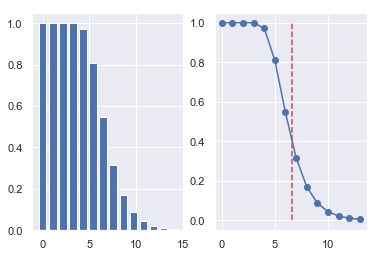

In [4]:
# ------ Plotting the graph for all K in [1,n] ------ #
%matplotlib inline
import matplotlib.pyplot as plt  
import seaborn as sns
sns.set()

Proba_it_rounded = np.zeros(n)
for K in range(n):
    P_it = np.round(np.linalg.matrix_power(transition_matrix(K),np.int(n)),4)
    Proba_it_rounded[K] = P_it[0,K]

# Plotting the result
# Selecting only the number of throws with non zero probability
i, s = 0, True
while (i<K) and s:
    if Proba_it_rounded[i] < epsilon:
        s = False
    i = i+1
    
Proba_it_rounded = Proba_it_rounded[:i]
plt.figure(1)
plt.subplot(121)
plt.bar(np.linspace(0,i,i), Proba_it_rounded)
plt.subplot(122)
plt.plot(Proba_it_rounded, '-o')
plt.plot([np.log2(n),np.log2(n)],[0,1],'r--')
plt.show()

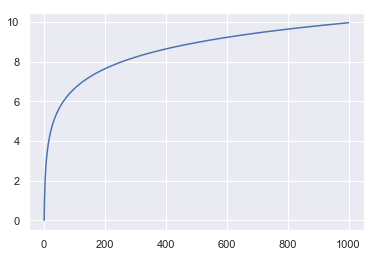

In [5]:
# ------ Going further ------ #
plt.figure(2)
n = 1000
plt.plot(np.linspace(1,n,n), np.log2(np.linspace(1,n,n)))
plt.show()